### 1. Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 2. Load thedata

In [2]:
# Load dataset from a CSV file.
wqi = pd.read_csv('wqi_after_eda.csv')

### 3. Exploring the data

In [3]:
# Look at the dimensions of the dataset. 
wqi.shape

(1025, 14)

In [4]:
# Display the first few rows of the DataFrame (wqi).
wqi.head()

,Station_no,Date,Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI,Water Quality Classification
0,242,2019-10-03,23.85,6.72,7.85,0.1,0.1,0.7,0.1,5.5,2.0,1.7,36.042485,Good (3)
1,242,2019-10-03,25.01,6.36,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.878936,Good (3)
2,242,2019-10-03,25.29,6.36,7.80,0.1,0.1,0.8,0.1,6.5,2.0,2.7,39.179552,Good (3)
3,350,2019-10-03,19.94,6.50,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.759645,Good (3)
4,350,2019-10-03,20.11,6.47,7.82,0.1,0.1,0.8,0.1,6.0,2.0,1.9,37.212797,Good (3)


In [5]:
# Display the names of all the columns in the DataFrame (wqi).
wqi.columns

Index(['Station_no', 'Date', 'Cond (μS/cm)', 'DO (mg/L)', 'pH', 'NO2 (mg/L)',
       'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)', 'TSS (mg/L)', 'BOD (mg/L)',
       'Turbidity (NTU)', 'WQI', 'Water Quality Classification'],
      dtype='object')

In [6]:
# Get information about the columns, data types, and the presence of missing values.
wqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Station_no                    1025 non-null   int64  
 1   Date                          1025 non-null   object 
 2   Cond (μS/cm)                  1025 non-null   float64
 3   DO (mg/L)                     1025 non-null   float64
 4   pH                            1025 non-null   float64
 5   NO2 (mg/L)                    1025 non-null   float64
 6   NO3 (mg/L)                    1025 non-null   float64
 7   TN (mg/L)                     1025 non-null   float64
 8   TP (mg/L)                     1025 non-null   float64
 9   TSS (mg/L)                    1025 non-null   float64
 10  BOD (mg/L)                    1025 non-null   float64
 11  Turbidity (NTU)               1025 non-null   float64
 12  WQI                           1025 non-null   float64
 13  Wat

There are no missing values in the dataset. Most of the data are numeric except for the 'Date' and 'Water Quality Classification' columns. 

'Date' column in the dataset is currently stored as an object data type, which typically indicates that it's being treated as a string. 

In [7]:
# Convert the 'Date' column to datetime format.
wqi['Date'] = pd.to_datetime(wqi['Date'])

In [8]:
# Display the data types of each column in the DataFrame (wqi).
wqi.dtypes

Station_no                               int64
Date                            datetime64[ns]
Cond (μS/cm)                           float64
DO (mg/L)                              float64
pH                                     float64
NO2 (mg/L)                             float64
NO3 (mg/L)                             float64
TN (mg/L)                              float64
TP (mg/L)                              float64
TSS (mg/L)                             float64
BOD (mg/L)                             float64
Turbidity (NTU)                        float64
WQI                                    float64
Water Quality Classification            object
dtype: object

### 4. Create dummy features for categorical variables

In [9]:
# Convert categorical variable, 'Water Quality Classificaion', into a binary columns using one-hot encoding.
dummy = pd.get_dummies(wqi['Water Quality Classification'], prefix='WQC')
dummy.head()

,WQC_Excellent (4),WQC_Good (3),WQC_Poor (2),WQC_Unfit for consumption (0),WQC_Very Poor (1)
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [10]:
# Concatenate the original DataFrame (wqi) with the dummy DataFrame (dummy)
wqi = pd.concat([wqi, dummy], axis=1)
wqi.head()

,Station_no,Date,Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI,Water Quality Classification,WQC_Excellent (4),WQC_Good (3),WQC_Poor (2),WQC_Unfit for consumption (0),WQC_Very Poor (1)
0,242,2019-10-03,23.85,6.72,7.85,0.1,0.1,0.7,0.1,5.5,2.0,1.7,36.042485,Good (3),False,True,False,False,False
1,242,2019-10-03,25.01,6.36,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.878936,Good (3),False,True,False,False,False
2,242,2019-10-03,25.29,6.36,7.80,0.1,0.1,0.8,0.1,6.5,2.0,2.7,39.179552,Good (3),False,True,False,False,False
3,350,2019-10-03,19.94,6.50,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.759645,Good (3),False,True,False,False,False
4,350,2019-10-03,20.11,6.47,7.82,0.1,0.1,0.8,0.1,6.0,2.0,1.9,37.212797,Good (3),False,True,False,False,False


### 4. Standardize the magnitude of numeric features

/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldc

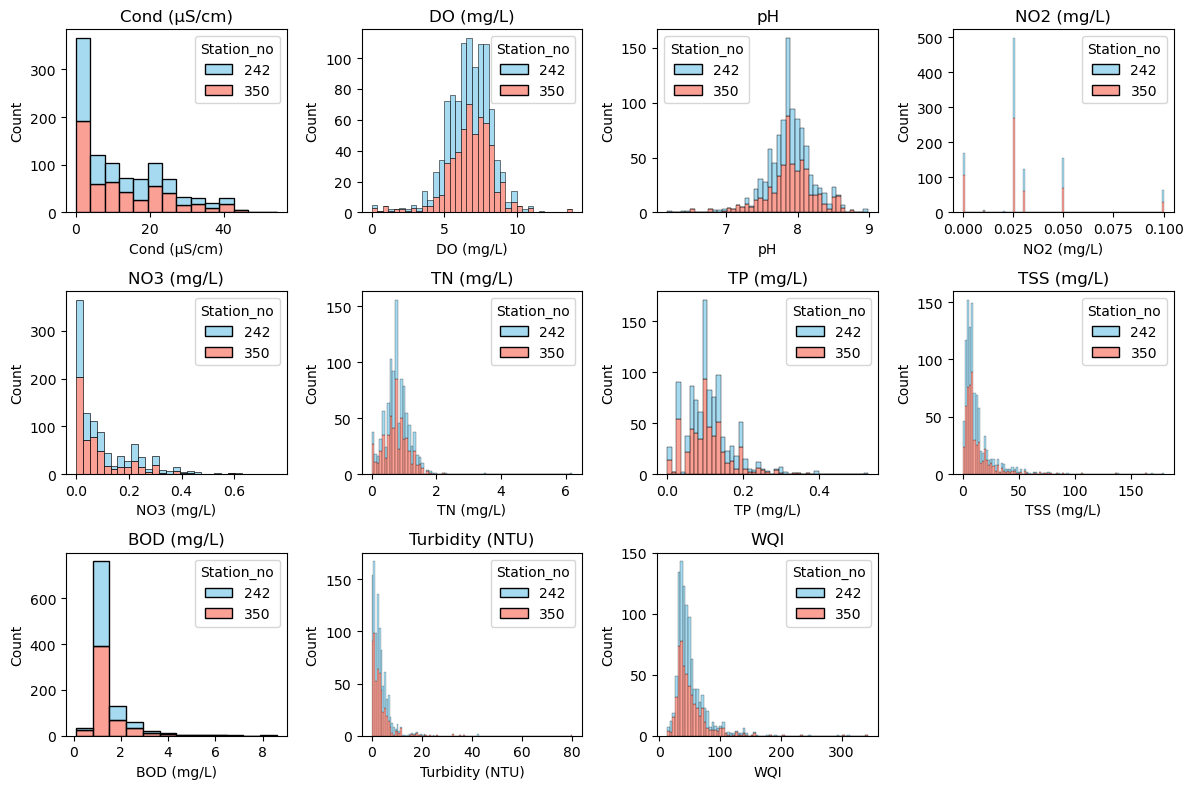

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data by station numbers 242 and 350
filtered_data = wqi[wqi['Station_no'].isin([242, 350])]

# List of numerical columns
numerical_columns = ['Cond (μS/cm)', 'DO (mg/L)', 'pH', 'NO2 (mg/L)', 
                     'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)', 'TSS (mg/L)', 
                     'BOD (mg/L)', 'Turbidity (NTU)', 'WQI']

# Plot histograms for numerical features with hue as 'Station_no'
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data=filtered_data, x=col, hue='Station_no', multiple='stack', palette = ['skyblue', 'salmon'])
    plt.title(col)
plt.tight_layout()
plt.show()

It can be seen from the distribution plots that the range or scale of values for each feature differs. For example, DO is measured in mg/L, while cond is measured in μS/cm. Some features have a narrow range, with values concentrated within a small interval, while others have a wider range, with values spread out over a larger interval. The spread of data points within each feature's distribution vary. Features with a wider spread have more variability in their values, while features with a narrower spread have less variability.The central tendency differ among features. Some features have a higher average value compared to others. For this reason we need to rescale the data to ensure that it is on the same scale. 

In [13]:
# Extract numerical features
numerical_features = wqi[numerical_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(numerical_features)

# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numerical_columns)

# Display the first few rows of the scaled DataFrame
scaled_df.head()

,Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI
0,0.998912,0.029068,-0.116444,3.044528,-0.04123,-0.224131,-0.179333,-0.468588,0.752686,-0.409719,-0.518638
1,1.097981,-0.199052,-0.237956,3.044528,-0.04123,0.022156,-0.179333,-0.438857,0.752686,-0.409719,-0.491041
2,1.121894,-0.199052,-0.268335,3.044528,-0.04123,0.022156,-0.179333,-0.409126,0.752686,-0.208066,-0.415137
3,0.664983,-0.110338,-0.237956,3.044528,-0.04123,0.022156,-0.179333,-0.438857,0.752686,-0.409719,-0.494977
4,0.679502,-0.129348,-0.207578,3.044528,-0.04123,0.022156,-0.179333,-0.438857,0.752686,-0.369388,-0.480026


### 5. Split into testing and training datasets

In [14]:
# Define features (X) and target variable (y)
X = scaled_df
y = wqi['WQI'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (820, 11) (820,)
Testing set shape: (205, 11) (205,)
